In [27]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import statistics as st

In [2]:
nome_arquivo_csv = 'dataset.csv'
dados = pd.read_csv(nome_arquivo_csv)


# 1.Descrição de projeto:


## 1.1 Contexto de algumas variáveis:


# 2. Pré-processamento

## 2.1 Leitura dos dados

In [3]:
display(dados)

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.730000,0,Caucasian,M,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.420000,0,Caucasian,F,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.950000,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.640000,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,75.0,23.060250,0,Caucasian,M,177.8,Floor,...,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular,NaN,0
91709,66119,13486,121,56.0,47.179671,0,Caucasian,F,183.0,Floor,...,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
91710,8981,58179,195,48.0,27.236914,0,Caucasian,M,170.2,Accident & Emergency,...,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
91711,33776,120598,66,NaN,23.297481,0,Caucasian,F,154.9,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0


## 2.2 Analise Descritiva:


### 2.2.1 Entendendo os conceitos

Aqui entendermos melhor as variaveis de maior interesse e como elas se relacionam. Elas serão dividas em duas categorias, serão variáveis qualitativas e quantitativas.Elas serão analisadas por meio de gráficos de forma que entendamos melhor seus comportamentos e suas frequências.  
As variáveis de interesse serão:  
* __gender__: O sexo genotípico do paciente.  
* __icu_admit_source__: A localização do paciente antes de ser admitido na unidade.  
* __leukemia__: Se o paciente foi diagnosticado com leucemia mielóide aguda ou crônica, leucemia linfocítica aguda ou crônica ou mieloma múltiplo.  
* __diabetes_mellitus__: Se o paciente foi diagnosticado com diabetes, seja juvenil ou adulto, que requer medicação.  
* __solid_tumor_with_metastasis__: Se o paciente foi diagnosticado com algum carcinoma tumoral sólido (incluindo melanoma maligno) que apresenta evidência de metástase.  
* __hospital_death__: Se o paciente morreu durante esta hospitalização. 
 
As variáveis acima são qualitativas, veremos posteriormente se elas tem relação com a taxa de mortalidade. Elas foram escolhidas de modo a verificar se gênero, doenças e local de onde foram admitidas tem relação com morte.

__VARIAVEIS DE APACHE-III__
  
 Já as variáveis abaixo são qualitativas, serão analisadas para observar sua relação com a taxa de mortalidade, algumas delas foram escolihdas com base no diagnóstico APACHE-III pois são as categorias que mais pontuam nesse diagnóstico e assim podem ter grande interesse na taxa de mortalidade.  

* __heart_rate_apache__: A frequência cardíaca medida durante as primeiras 24 horas que resulta na pontuação APACHE III mais alta.
* __temp_apache__: A temperatura medida durante as primeiras 24 horas que resulta na pontuação APACHE III mais alta.
* __resprate_apache__: A frequência respiratória medida durante as primeiras 24 horas que resulta na pontuação APACHE III mais alta.
* __map_apache__: A pressão arterial média medida durante as primeiras 24 horas que resulta na pontuação APACHE III mais alta.




### 2.2.2 Funções

Aqui estarão asfunções de associção entre variaveis qualitativas e quantitativas usadas para descrever e entender relações das variáveis por meio de gráficos e tabelas.

In [4]:
def grafico_qualitativa(var,dataframe, ax=None):
     dados_qualitativa = dataframe[var].value_counts(normalize = True).reset_index(name='Frequência').rename(columns={'index':var})
     display(dados_qualitativa)
     
     if ax is None:
          fig, ax = plt.subplots(figsize=(12, 4))
          
     dados_grafico = dataframe[var].value_counts()
     dados_grafico = dataframe[var].value_counts()
     dados_grafico.plot(kind='bar', ax=ax)
     
     plt.xlabel('Valores')
     plt.ylabel('Frequência')
     plt.title(f'Gráfico da Frequência:{var}')

In [5]:
def qualitativaXquantativa(varName1,varName2,dataframe,ax = None):
    if ax is None:
        _, ax = plt.subplots(figsize=(6, 4))
    title = varName1 + " per " + varName2
    ax.set_title(title, fontsize=12)
    sn.boxplot(data=dataframe, x=varName2, y=varName1, ax=ax)
    ax.set_ylabel(varName1, fontsize=12)
    ax.set_xlabel(varName2, fontsize=12)
    display(dataframe[[varName1, varName2]].groupby(varName2).describe())


In [6]:
def QualiQualiAssociation(varName1, varName2,dataframe, ax=None):
    SQ_tb = pd.crosstab(index = dataframe[varName1],columns = dataframe[varName2], normalize = "index")#, margins = True
    title = "Conditional Proportion: " + varName2  + " per " +  varName1 
    print("******** " + title + " ********")
    display(SQ_tb)
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 4))
    
    image = SQ_tb.plot(kind="bar", figsize=(12,4), stacked=False,title=title,fontsize=12,ax= ax)
    image.set_ylabel("%",fontsize=12)
    image.set_xlabel(varName1,fontsize=12)

In [7]:
def freqConti(varName, dataframe):
    x = dataframe[varName]
    n = len(x)
    sqrt_n = np.sqrt(n) 
    k = round(sqrt_n)
    distrFreqCont = x.value_counts(bins=k, sort=False)
    display(pd.DataFrame(distrFreqCont))

In [8]:
def histograma(varName, dataframe):
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    sn.histplot(dataframe[varName], color='b', bins=100, ax=axs[0])
    dataframe[varName].plot(kind='box', ax=axs[1], title='')
    axs[1].set_ylabel(varName)
    plt.tight_layout()
    plt.show()

In [24]:
def moda_czuber(data):
    freq = {}
    for i in data:
        if i in freq:
            freq[i] += 1
        else:
            freq[i] = 1

    moda = max(freq, key=freq.get)
    freq_anterior = freq.get(moda - 1, 0)
    freq_posterior = freq.get(moda + 1, 0)

    amplitude = None
    if len(data) >= 2:
        sorted_data = sorted(data)
        amplitude = sorted_data[1] - sorted_data[0]

    if amplitude is not None:
        return moda + ((freq_posterior - freq_anterior) / (2 * freq_posterior - 2 * freq[moda])) * amplitude
    else:
        return moda

In [28]:

def measuresOfPositionAndDispersion(data,key):
    dataset = pd.DataFrame({"Variable": key ,"Amount": len(data),"Mean": [st.mean(data.dropna())], "Mode ": moda_czuber(data.dropna()), "Median": [st.median(data.dropna())], "Variance": [st.variance(data.dropna())], "Standard deviation": [st.stdev(data.dropna())], "Amplitude": [max(data.dropna()) - min(data.dropna())]})
    return dataset

### 2.2.3 Frequências das qualitativas

#### 2.2.3.1 Distribuição das frequências para as variáveis escolhidas

__*__ Aqui analisaremosas distribuições de freqências para as variáveis escolhidas e posteriormente veremos se essas variáveis terão relação com a mortalidade no hospital.

,gender,Frequência
0,M,0.539536
1,F,0.460464


******** Conditional Proportion: hospital_death per gender ********


hospital_death,0,1
gender,,
F,0.911627,0.088373
M,0.915583,0.084417


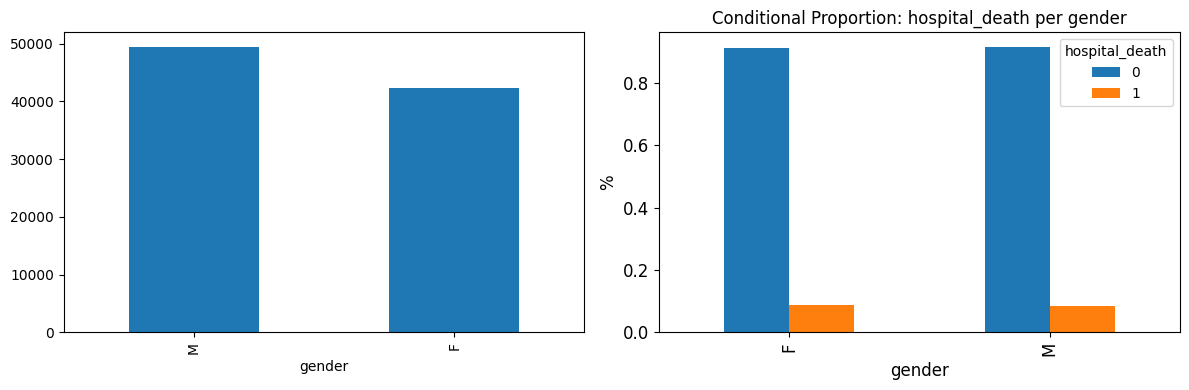

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
grafico_qualitativa("gender", dados, axs[0])
QualiQualiAssociation("gender","hospital_death",dados,axs[1])
plt.tight_layout()
plt.show()

* Diante do gráfico podemos perceber que a quantidade de homens a entrar na UTI é um pouco maior, porem não interferência significativa nas mortes.  
Sendo a quantidade de mortes por genêro de 8,84% e a de morte por genêro masculino de 8,44%.

,leukemia,Frequência
0,0.0,0.992934
1,1.0,0.007066


******** Conditional Proportion: hospital_death per leukemia ********


hospital_death,0,1
leukemia,,
0.0,0.914659,0.085341
1.0,0.814930,0.185070


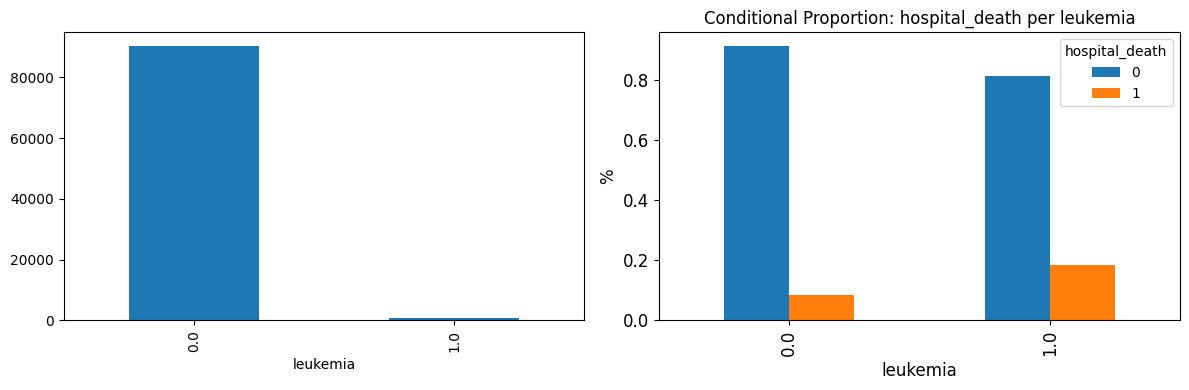

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
grafico_qualitativa("leukemia", dados, axs[0])
QualiQualiAssociation("leukemia","hospital_death",dados,axs[1])
plt.tight_layout()
plt.show()

* Já diante do gráfico dos pacientes diagnosticados com leucemia vemos que somente 0,71% dos pacientes foram diagnosticados com essa doença, porém interfere de forma significativa nas mortes.  
 Os pacientes que não foram diagnosticados com leucemia tem somente 8.53%na taxa de mortalidade enquanto os pacientes diagnosticados com leucemia tem 18.51% de taxa de mortalidade apresentando assim aproximadamente 10% a mais na taxa de mortalidade.

,diabetes_mellitus,Frequência
0,0.0,0.774808
1,1.0,0.225192


******** Conditional Proportion: hospital_death per diabetes_mellitus ********


hospital_death,0,1
diabetes_mellitus,,
0.0,0.911568,0.088432
1.0,0.922165,0.077835


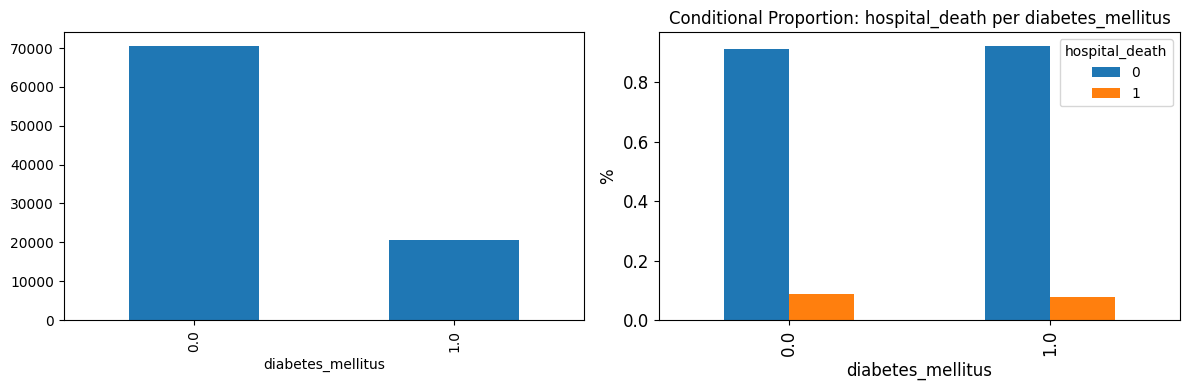

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
grafico_qualitativa("diabetes_mellitus", dados, axs[0])
QualiQualiAssociation("diabetes_mellitus","hospital_death",dados,axs[1])
plt.tight_layout()
plt.show()

* Já na análise de pacientes com diabetes vemos que uma quantidade de 22.51% possuem a doença mas que ela não tem grande inteferência na taxa de mortalidade.
Dos pacientes que morreram 8.84% não possuiam a doença enquanto 7.78% possuiam a doença.

,solid_tumor_with_metastasis,Frequência
0,0.0,0.979362
1,1.0,0.020638


******** Conditional Proportion: hospital_death per solid_tumor_with_metastasis ********


hospital_death,0,1
solid_tumor_with_metastasis,,
0.0,0.916035,0.083965
1.0,0.815229,0.184771


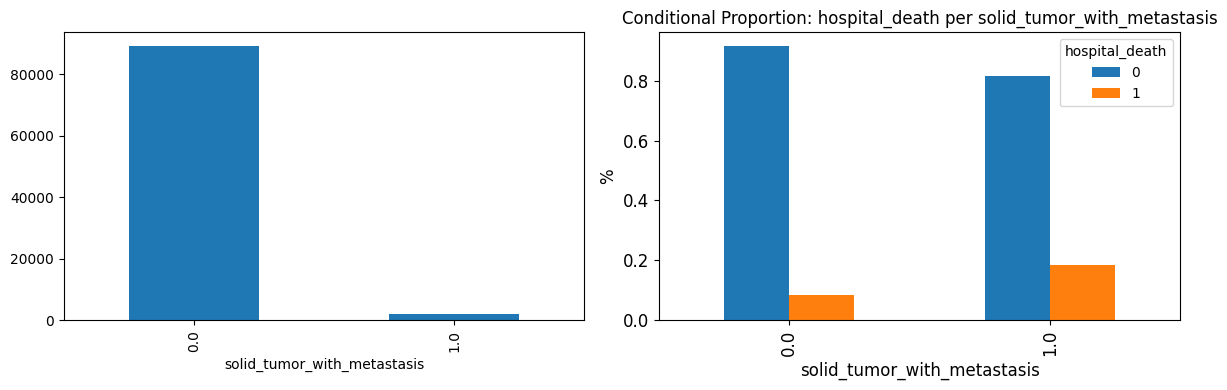

'solid_tumor_with_metastasis'

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
grafico_qualitativa("solid_tumor_with_metastasis", dados, axs[0])
QualiQualiAssociation("solid_tumor_with_metastasis","hospital_death",dados,axs[1])
plt.tight_layout()
plt.show()
"solid_tumor_with_metastasis"

* Na análise dos pacientes que possuem ou não tumor sólido com metástase vemos que somente 2.06% possuem a doença, mas ela possue uma grande interferência na taxa de mortalidade. 
 Os pacientes que não foram diagnosticados com tumor sólido com metástase tem somente 8.39% na taxa de mortalidade enquanto os pacientes diagnosticados com tumor sólido com metástase tem 18.48% de taxa de mortalidade apresentando assim aproximadamente 10% a mais na taxa de mortalidade. 


,icu_admit_source,Frequência
0,Accident & Emergency,0.590168
1,Operating Room / Recovery,0.204288
2,Floor,0.170424
3,Other Hospital,0.025742
4,Other ICU,0.009378


******** Conditional Proportion: hospital_death per icu_admit_source ********


hospital_death,0,1
icu_admit_source,,
Accident & Emergency,0.913615,0.086385
Floor,0.865864,0.134136
Operating Room / Recovery,0.962700,0.037300
Other Hospital,0.865564,0.134436
Other ICU,0.855646,0.144354


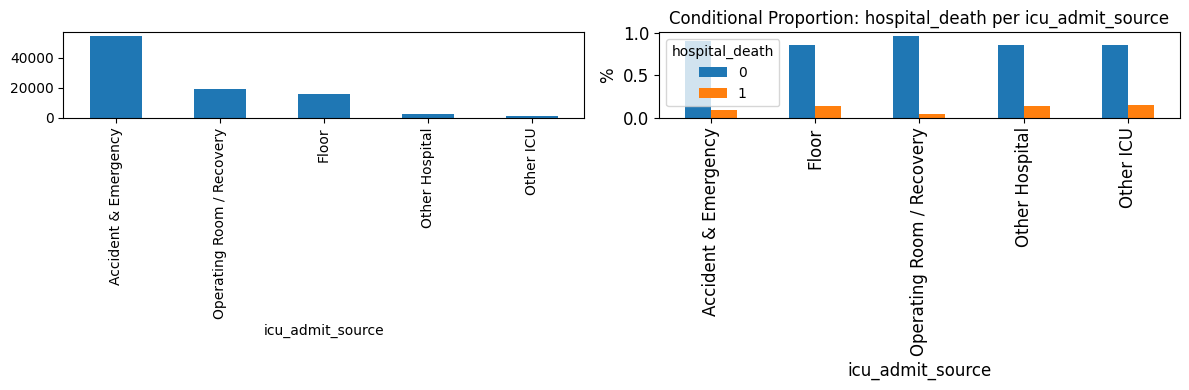

In [13]:

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
grafico_qualitativa("icu_admit_source", dados, axs[0])
QualiQualiAssociation("icu_admit_source","hospital_death",dados,axs[1])
plt.tight_layout()
plt.show()


* Na análise de localização do paciente antes de ser admitido na unidade vemos que a grande maioria dos pacientes vem da emergência e acidentes e que a minoria vem de outras UTI´s.  
Porém na taxa de mortalidade uma pequena maioria de mortes é dos pacientes que vem de outra UTI e a menor taxa são dos pacientes que vem sala de operação e recuperação.

Na análise de variáveis qualitativas podemos ver que as variáveis que mais afetam na taxa de mortalide e portanto as de maior interesse são:  
* os pacientes diagnosticados com leucemia.
* os pacientes diagnosticados com tumor solido com metastase.
* os pacientrs  que dão entrada na UTI vindo de outra UTI.

### 2.2.4 Graficos das quantitativas

#### 2.2.4.0 Introdução 

Como já mencionado analisaremos aqui algumas variaveis responsáveis por pontuar no apache-III.   
São elas:  
__resprate_apache__   
__map_apache__  
__temp_apache__   
__heart_rate_apache__  

AQUI FICA A TABELA

Como as variáveis de interesse nos fornece valores de referencia por faixas etarias é importante analisar as medidas de posição e dispersão por idade. 

In [29]:
dataframe = dados
varName = "age"
pd.DataFrame(dataframe[varName].describe()).transpose()
display(dataframe.groupby('hospital_death')[varName].describe())
display(measuresOfPositionAndDispersion(dataframe[varName],varName))
bivariateGroup = dataframe.groupby('hospital_death')[varName]
groupKeys = bivariateGroup.groups.keys()
for key in groupKeys:
    display(measuresOfPositionAndDispersion(bivariateGroup.get_group(key), key))

,count,mean,std,min,25%,50%,75%,max
hospital_death,,,,,,,,
0,80212.0,61.748741,16.860137,16.0,52.0,64.0,75.0,89.0
1,7273.0,68.494156,14.428363,16.0,60.0,71.0,80.0,89.0


,Variable,Amount,Mean,Mode,Median,Variance,Standard deviation,Amplitude
0,age,91713,62.309516,67.0,65.0,281.40461,16.775119,73.0


,Variable,Amount,Mean,Mode,Median,Variance,Standard deviation,Amplitude
0,0,83798,61.748741,67.0,64.0,284.26423,16.860137,73.0


,Variable,Amount,Mean,Mode,Median,Variance,Standard deviation,Amplitude
0,1,7915,68.494156,80.0,71.0,208.177668,14.428363,73.0


Pelos dados obtidos podemos dizer que a maioria dos pacientes são idosos portanto consideraremos os valores da tabela correspondente a essa faixa etaria e tambem os valores de referencia fornecidos pelo ministerio da saude. 
São eles:  
Temperatura corporal: entre 35 º C e 36º C.  
Frequência cardíaca (pulso): entre 60 e 90 bpm.  
Pressão arterial Sistólica: entre 100 e 140 mmHg e diastólica entre 60 e 90 mmHg.  
Saturação de oxigênio sanguínea: cima de 96.  
Respiração: entre 16 e 20 mrpm.  

#### 2.2.4.1 heart_rate_apache (Frequência cardiaca)

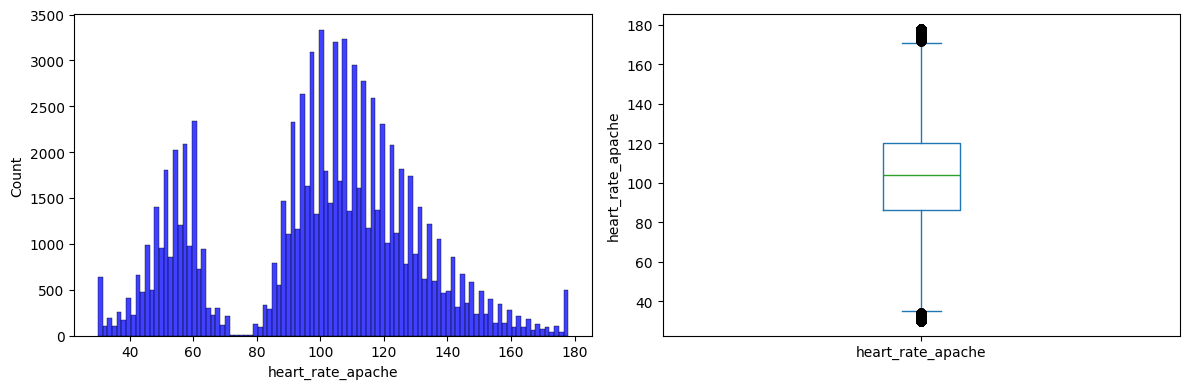

In [14]:
histograma("heart_rate_apache",dados)



* Por a análise do gráfico univariado de frequência cardiaca há uma concentração um pouco grande entre 45 e 60 mas que a maior concentração encontra-se entre 90 e 130.  
O gráfico em boxplot nos mostra que as medidas abaixo de 40 e acima de 170 já são considerados pontos aberrantes.  
Os valores esperados podem ser analisados de duas formas, pelas medidas de posição e dispersão vemos que a maioria dos pacientes estão acima dos 60 anos, portanto a frequência cardiaca esperada é entre 45 a 90 bpm.  
O Ministério da Saúde estabeleceu valores normais de referência entre 60 e 90 bpm.  
Assim, pela análise dessas duas referencias podemos afirmar que a frequencia cardica dos pacientes esta bastante elevada.  

heart_rate_apache                                            \
                           count        mean        std   min   25%    50%   
hospital_death                                                               
0                        83026.0   98.687170  30.301010  30.0  85.0  103.0   
1                         7809.0  110.560763  34.563873  30.0  96.0  116.0   

                              
                  75%    max  
hospital_death                
0               118.0  178.0  
1               133.0  178.0

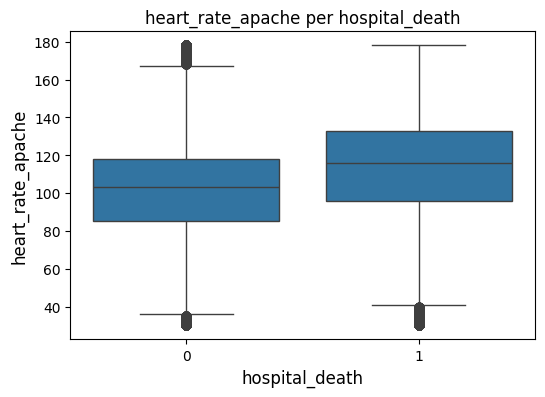

In [15]:
qualitativaXquantativa("heart_rate_apache","hospital_death",dados,ax=None)

* Análisando agora a frequência cardiaca das pessoas por morte obtemos dados interessantes.  
Os pacientes que vieram a obito tiveram uma frequência cardiaca maior e isso é observado tanto no gráfico quanto na tabela.  
Estes pacientes tem uma media mais elevada com aproximadamente 12 pontos a mais daqueles que não vieram a obito. Além disso, no gráfico podemos ver que os pacientes que morreram não possuem pontos aberrantes para cima.  
Nas duas categorias de pacientes observamos que amédia de frequência cardiaca era acima dos valores de referência.

#### 2.2.4.2 map_apache(Pressão arterial)

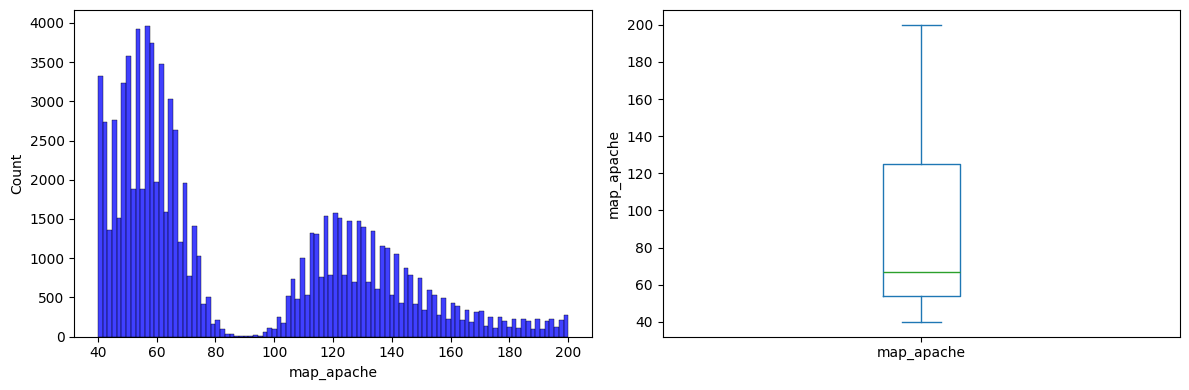

In [16]:
histograma("map_apache",dados)


* Na análise do gráfico univariado de pressão arterial percebemos que a maioria dos pacientes estão entre 40 e 80 de pressão arterial e que os outros estão distribuidos ao longo de de 110 a 200.  
Apartir desses gráficos não conseguimos muitas  coisas, o boxplot não possui pontos aberrantes e o grafico de barras só nos mostrou a grande concentração de pessoas esta entre 40 e 60.

map_apache                                                 \
                    count       mean        std   min   25%   50%    75%   
hospital_death                                                             
0                 82928.0  88.537985  41.389294  40.0  55.0  67.0  124.0   
1                  7791.0  82.458478  48.002929  40.0  45.0  56.0  128.0   

                       
                  max  
hospital_death         
0               200.0  
1               200.0

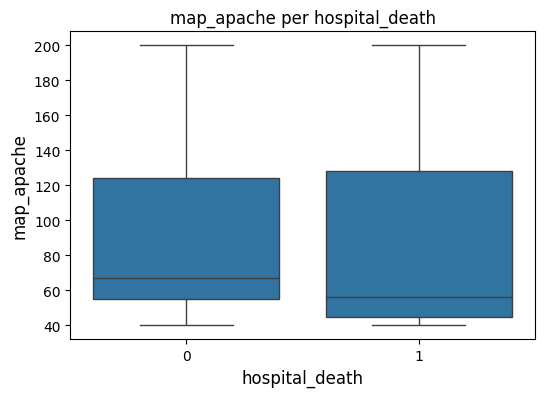

In [17]:
qualitativaXquantativa("map_apache","hospital_death",dados)

* Na análise do gráfico bivariado de pressão arterial obtemos melhores informações, no gráfico boxplot ainda não há pontos aberrantes no entanto vemos que os pacientes que vieram a obito possuem pressão arterial menos elevada em comparação as pessoas que não vieram a obito.  
Os pacientes que morreram possuem 6 pontos de media menor.

#### 2.2.4.3 temp_apache (Temperatura corporal)

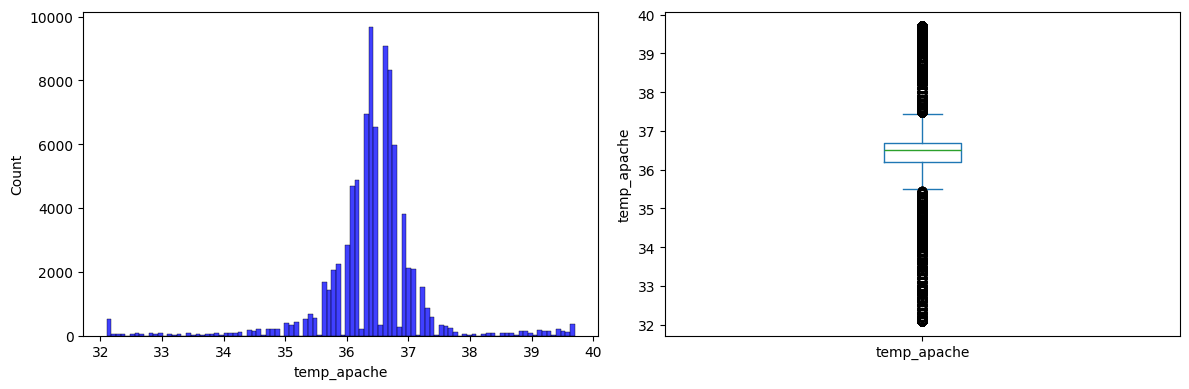

In [18]:
histograma("temp_apache",dados)


* No gráfico univariado de temperatura percebemos uma grande concentração entre 36 e 37 e varios pontos aberrantes tanto para baixo quanto para cima.  
A temperatura esperade tanto para pacientes idosos quanto pelo ministerio da saude é entre 36,1ºC e 37,2ºC.  
Portnato, a concetração de pacientes esta com valores normais

temp_apache                                                   
                     count       mean       std   min   25%   50%   75%   max
hospital_death                                                               
0                  80249.0  36.454504  0.737525  32.1  36.2  36.5  36.7  39.7
1                   7356.0  35.977758  1.460004  32.1  35.6  36.3  36.7  39.7

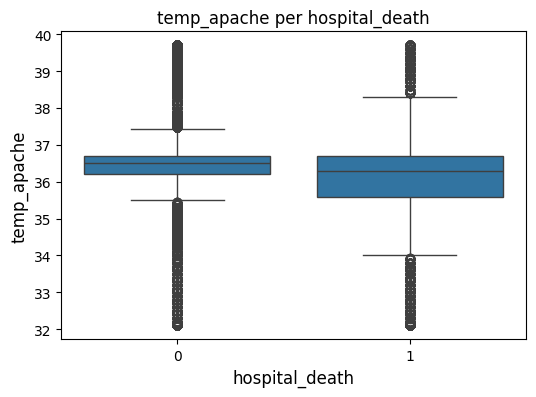

In [19]:
qualitativaXquantativa("temp_apache","hospital_death",dados)

* Na análise do gráfico bivariado de temperatura percebemos que os pacientes que vieram a obito tem valores abaixo do nivel de referencia sendo uma temperatura considerada baixa.  
Tambem percebemos que o boxplot daqueles que morreram é mais cheio, por causa que há maior variabilidade de temperatura.

#### 2.2.4.4 resprate_apache (Frequência respiratoria)

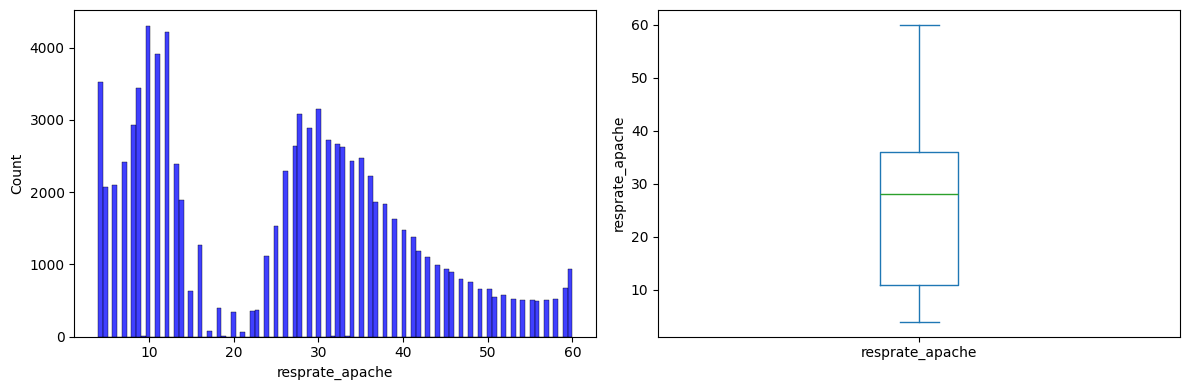

In [20]:
histograma("resprate_apache",dados)


* No gráfico univariado de frequencia respiratoria percebemos dois grandes pontos de concentração entre 5 e 15 e entre 25 e 40.  
Observamos tambem que no grafico boxplot não há pontos aberrantes.  
A frequencia respiratoria considerada normal no nosso grupo de interesse é entre 16 a 25 mrm e pelo ministerio da saude é de entre 16 e 20 mrpm.


resprate_apache                                               \
                         count       mean        std  min   25%   50%   75%   
hospital_death                                                                
0                      82687.0  25.409111  15.072045  4.0  11.0  27.0  36.0   
1                       7792.0  30.075834  14.808783  4.0  16.0  32.0  39.0   

                      
                 max  
hospital_death        
0               60.0  
1               60.0

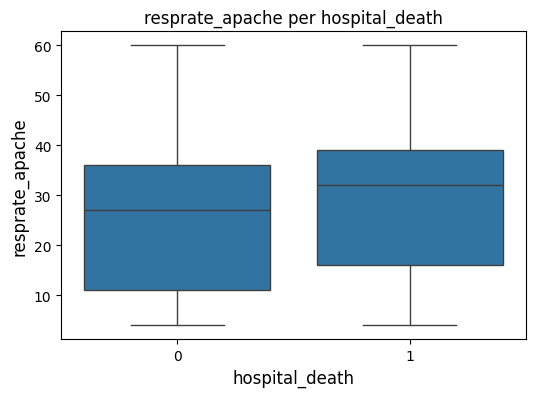

In [21]:
qualitativaXquantativa("resprate_apache","hospital_death",dados)

* No gráfico bivariado de frequencia respiratoria percebemos que a frequencia dos pacientes que vieram a obito é bem maior do que a esperada nos dois valores de referencia com 5 pontos a mais.

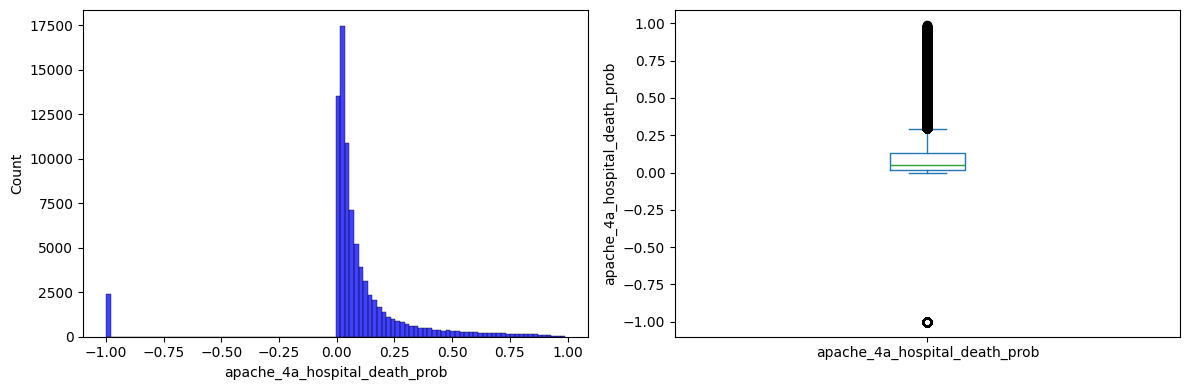

apache_4a_hospital_death_prob                      \
                                                  count      mean       std   
icu_admit_source                                                              
Accident & Emergency                            49451.0  0.099622  0.227396   
Floor                                           14176.0  0.131537  0.292092   
Operating Room / Recovery                       17297.0  0.038619  0.176354   
Other Hospital                                   2202.0  0.137402  0.256772   
Other ICU                                         556.0 -0.733525  0.481898   

                                                        
                           min   25%   50%   75%   max  
icu_admit_source                                        
Accident & Emergency      -1.0  0.02  0.05  0.13  0.99  
Floor                     -1.0  0.04  0.09  0.22  0.97  
Operating Room / Recovery -1.0  0.01  0.02  0.06  0.95  
Other Hospital            -1.0  0.04  0.08  0.20  0.93  
Other ICU                 -1.0 -1.00 -1.00 -1.00  0.71

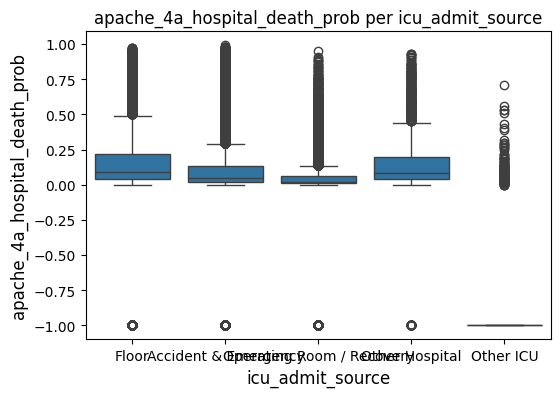

In [22]:
histograma("apache_4a_hospital_death_prob",dados)
qualitativaXquantativa("apache_4a_hospital_death_prob","icu_admit_source",dados)